
 # Investigating the 2017 Houston Astros cheating scandal
 ### Ori Applbaum 

# Background
In 2017, the Houston Astros were widely considered the best team; they ended up beating the Los Angeles Dodgers in the World Series. Three years later, it was discovered through a thorough investigation that the Houston Astros in fact cheated in 2017 during their world series run. The Astros had set up cameras in center field to steal the signs from the opponent in order to know what pitch is coming. Someone in the Astros dugout would then bang on a trashcan to indicate which pitch was coming. The hardest thing in sports is hitting a Major League Fastball; an 100MPH fastball reaches the plate in just about 400 milliseconds. For reference, the blink of an eye takes 300-400 milliseconds. Knowing which pitch is coming makes hitting significantly easier and put the hitter at a huge advantage over the pitcher. 
For more details on the Astros cheating and the investigaion, visit https://www.espn.com/mlb/story/_/id/28476282/everything-need-know-mlb-sign-stealing-scandal

# Introduction
In this I will  demonstrate what I've learned about the Data Science life cycle by applying it to a real-world situation, in this case Major League Baseball. My goal in this tutorial is to collect data from the MLB from the past few years, mainly 2017, to see how the Astros faired against the rest of the league, during the years that they cheated. I will use machine learning to try and predict a players batting average based on previous performance,height,age and other factors. 
All the datasets are available in the Final_Tutorial repository.
The data can also be downloaded from http://www.seanlahman.com/baseball-archive/statistics/

## Step 1: Importing packages
 - Pandas (Panel Data Analysis): tabular data storage
 - Numpy (Numerical Python): matrix algebra and numerical operations
 - Matplotlib (Matplot for Python): quick plotting for python
 - sqllite3 : To work with Sqllite databases
 - seaborn: Visualization tool
 - sklearn: Used to Implement Machine learning Models
 

In [2]:
#Packages to Import before Starting
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Step 2/3: Collecting Data and Data Processing
The first part of the data science life cycle is to collect the data that we are going to use. As mentioned before the data is available in the repository and it was downloaded from Lahman. This data is already tidy so not much editing has to be done to improve readability. I added a Batting Average column and used queries to get the data that I wanted. I wrote queries to import the specific statistics that will be used. I merged multiple databases on each players name, so I could get each players information in the same table as their statistics

The Database contains every players statistics dating back to the 1870's. I will be focusing on the year 2017-2019, with a focus on 2017. The other query I wrote, extracts all the data from the Houston Astros from the year 2017, the year they were found guilty of stealing signs

In [3]:
#Importing the sql database We will be using
sqlite_file = 'lahmandb.sqlite'
conn = sqlite3.connect(sqlite_file)
# Query to get players from the year 2017
all_mlb = "SELECT playerID,yearID,teamID,G,AB,H, (1000*H/AB) as AVG,RBI,BB,SO FROM batting WHERE yearID == '2017' and AB > 50 "
#Query to get Astros players by 2017
astros_query = "SELECT playerID,yearID,teamID,G,AB,H,(1000*H/AB) as AVG,RBI,BB,SO FROM batting WHERE yearID == '2017' and teamID == 'HOU'and AB > 50 "
# Turning them into pandas dataframes
astros2017 = pd.read_sql(astros_query, conn)
mlb2017 = pd.read_sql(all_mlb,conn)
# Gets the players age and height from a different table
age_query = "SELECT playerID,birthyear, height FROM people"
age= pd.read_sql(age_query, conn)
#merging the 2017 statistics with the age dataframe  on the playerID so we can have access to height and year in the same table
mlb17age = mlb2017.merge(age, how = "inner", on = ["playerID"])
mlb17age

,playerID,yearID,teamID,G,AB,H,AVG,RBI,BB,SO,birthYear,height
0,abreujo02,2017,CHA,156,621,189,304,102,35,119,1987.0,75.0
1,adamsla01,2017,ATL,85,109,30,275,20,10,37,1989.0,76.0
2,adamsma01,2017,ATL,100,291,79,271,58,19,71,1988.0,75.0
3,adducji02,2017,DET,29,83,20,240,10,10,27,1985.0,74.0
4,adriaeh01,2017,MIN,70,162,43,265,24,16,25,1989.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,younger03,2017,LAA,47,110,29,263,16,5,31,1985.0,70.0
541,zimmebr01,2017,CLE,101,299,72,240,39,26,99,1992.0,77.0
542,zimmery01,2017,WAS,144,524,159,303,108,44,126,1984.0,75.0
543,zobribe01,2017,CHN,128,435,101,232,50,54,71,1981.0,75.0


In [4]:
## Astros 2017 Team with AVG,birthyear,and Height added
astros17age = astros2017.merge(age, how = "inner", on = ["playerID"])
astros17age

,playerID,yearID,teamID,G,AB,H,AVG,RBI,BB,SO,birthYear,height
0,altuvjo01,2017,HOU,153,590,204,345,81,58,84,1990.0,66.0
1,aokino01,2017,HOU,71,202,55,272,19,15,29,1982.0,69.0
2,beltrca01,2017,HOU,129,467,108,231,51,33,102,1977.0,73.0
3,bregmal01,2017,HOU,155,556,158,284,71,55,97,1994.0,72.0
4,centeju01,2017,HOU,22,52,12,230,4,4,12,1989.0,69.0
5,correca01,2017,HOU,109,422,133,315,84,53,92,1994.0,76.0
6,davisjd01,2017,HOU,25,62,14,225,7,4,20,1993.0,75.0
7,fishede01,2017,HOU,53,146,31,212,17,17,54,1993.0,75.0
8,gattiev01,2017,HOU,84,300,79,263,55,18,50,1986.0,76.0
9,gonzama01,2017,HOU,134,455,138,303,90,49,99,1989.0,73.0


## Exploratory Analysis & Data Visualization
All the data is prepared and ready to be visualized using graphs (Importing matplot)

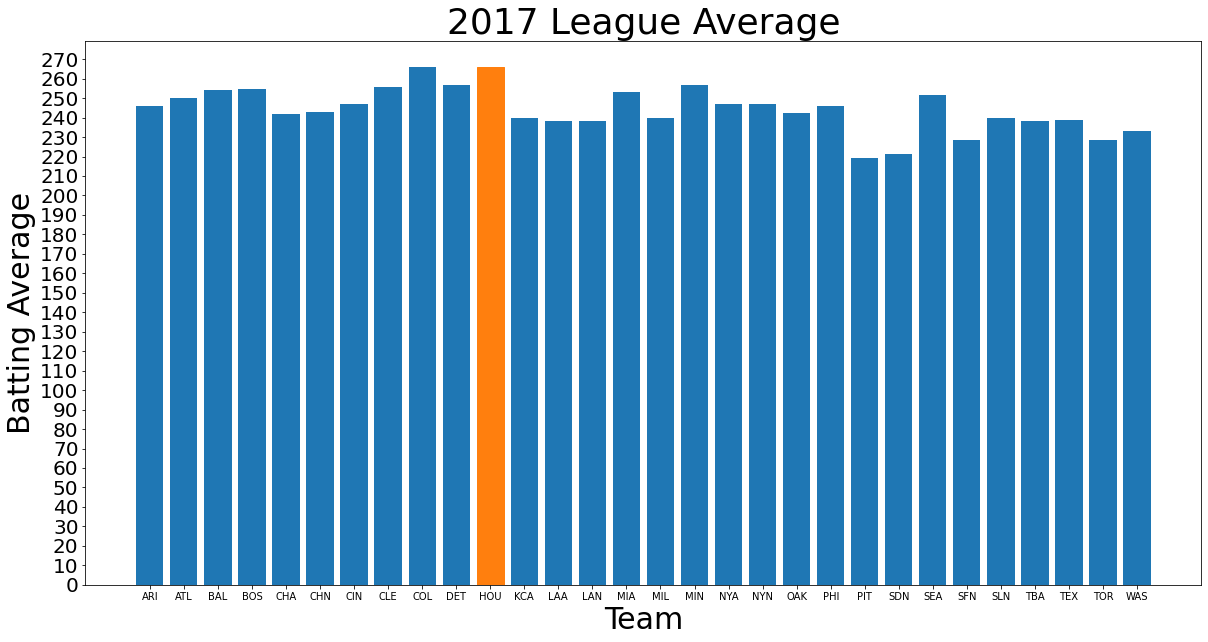

As seen from this bar graph, the Houston Astros (highlighted in Orange) finished just second in team batting average behind only the Colorado Rockies. The Rockies being first can be explained by the fact that they play in Denver,     where the altitiude is very high and the ball travels better. Everyone hits better at the Rockies home park


In [6]:
avg = mlb17age[['teamID','AVG']].groupby('teamID').mean()
plt.title("2017 League Average")
plt.xlabel("Team")
plt.ylabel("Batting Average")
plt.yticks(np.arange(0, 300, step=10))
plot= plt.bar(avg.index, avg['AVG'])
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 30})
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=20) 
plot[10].set_color('tab:orange')
plt.show()
print("As seen from this bar graph, the Houston Astros (highlighted in Orange) finished just second in team batting average behind only the Colorado Rockies. The Rockies being first can be explained by the fact that they play in Denver,     where the altitiude is very high and the ball travels better. Everyone hits better at the Rockies home park")

 ### Takeaways 
  - The Astros during the 2017 season had the second highest team batting average. 
  - The main factor in this statistic is that the astros were cheating and knew what pitches were coming most of the time 
  - The Astros also had good players which could have also accounted for the high batting averages. Although it is hard to tell if their averages were high only because of the cheating

Now I will make a graph that shows the amount of times the Astros struck out compared to the rest of the league
Knowing what pitch is coming, makes it a whole lot easier to not swing and miss


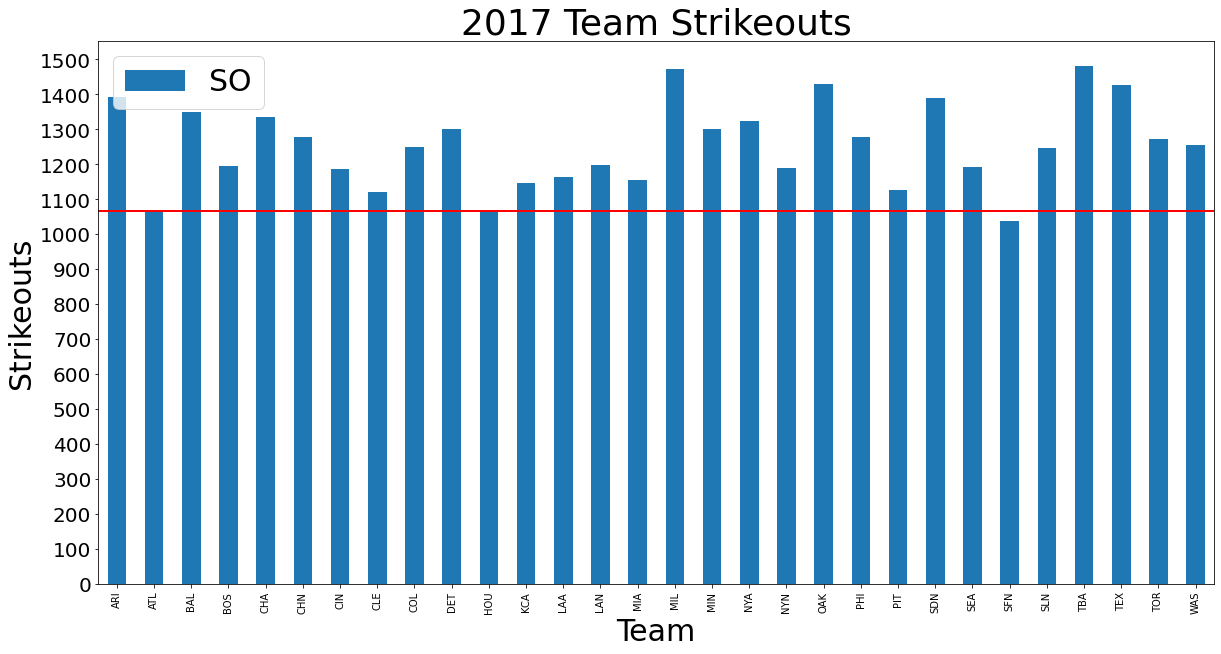

In [24]:
print("Now I will make a graph that shows the amount of times the Astros struck out compared to the rest of the league")
print("Knowing what pitch is coming, makes it a whole lot easier to not swing and miss")
SO = mlb17age[['teamID','SO']].groupby('teamID').sum().plot(kind = 'bar',stacked=True)
plt.title("2017 Team Strikeouts")
plt.xlabel("Team")
plt.ylabel("Strikeouts")
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})
plt.yticks(np.arange(0, 1600, step=100))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plot[10].set_color('r')
plt.axhline(1068, color='r', linewidth = 2)
plt.show()

It is clear that the Astros were top performers in most offensive categories during their 2017 championship season. That is what you would expect out of the best team. Now we'll take a look at how they performed against the league in 2016, before they started cheating.

To no surprise,this bar graph shows that the Houston Astros were bottom five in the league in batting average during the 2016 season 


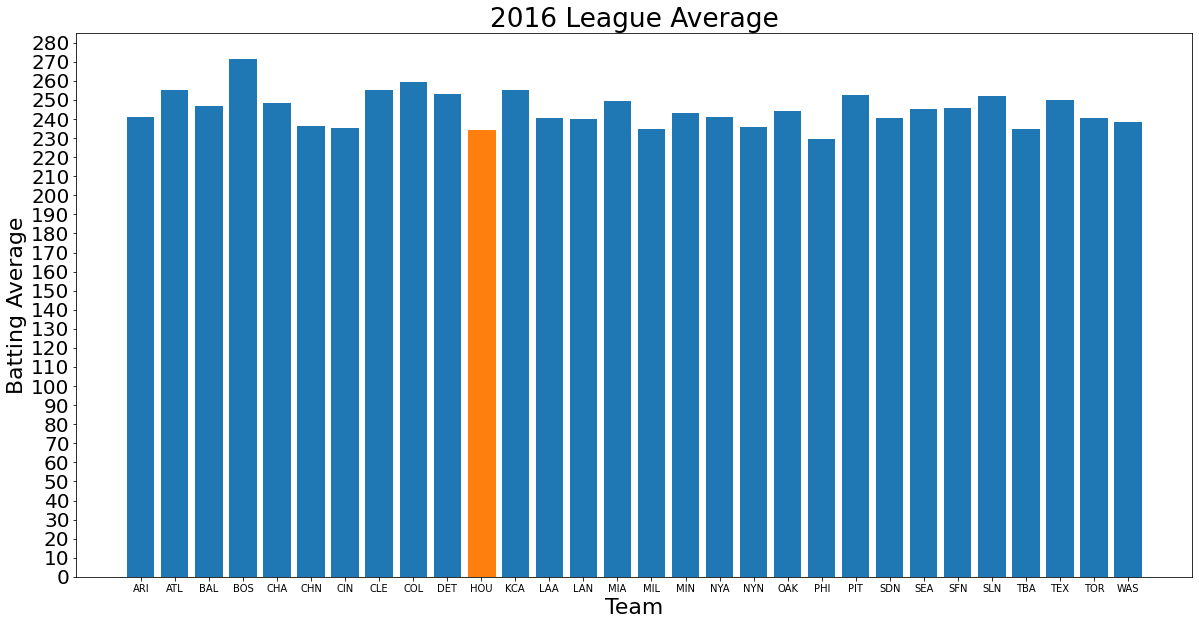

In [30]:
# New Queries to get MLB players stats from 2016
all_mlb = "SELECT playerID,yearID,teamID,G,AB,H, (1000*H/AB) as AVG,RBI,BB,SO FROM batting WHERE yearID == '2016' and AB > 50 "
mlb2016 = pd.read_sql(all_mlb,conn)
avg = mlb2016[['teamID','AVG']].groupby('teamID').mean()
plt.title("2016 League Average")
plt.xlabel("Team")
plt.ylabel("Batting Average")
plt.yticks(np.arange(0, 300, step=10))
plot= plt.bar(avg.index, avg['AVG'])
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=20) 
plot[10].set_color('tab:orange')
print("To no surprise,this bar graph shows that the Houston Astros were bottom five in the league in batting average during the 2016 season ")
plt.show()


## Takeaways:
 - The Houston Astros were one of the worst teams, batting average wise in the 2016 season. This was the year before they won the world series.
 - Sure, maybe they just got better but their team almost had the same players the year before.
 - How can this be explained? Well after the 2016 the Astros acquired bench coach Alex Cora. Cora was the leader in the sign stealing operation. Just a coincidence, that the year before they started cheating they were one of the worst hitting teams? I don't think so

Just like for 2017, Here is a graph that shows strikeouts compared to the league in 2016


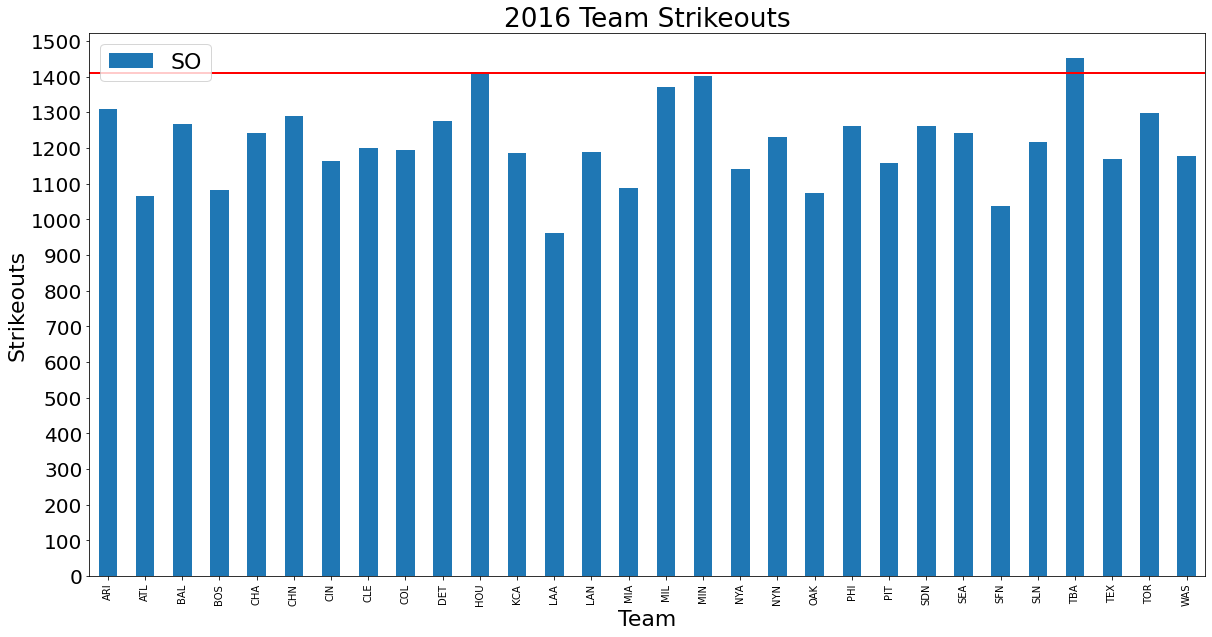

In [31]:
print("Just like for 2017, Here is a graph that shows strikeouts compared to the league in 2016")
SO = mlb2016[['teamID','SO']].groupby('teamID').sum().plot(kind = 'bar',stacked=False )
plt.title("2016 Team Strikeouts")
plt.xlabel("Team")
plt.ylabel("Strikeouts")
plt.rcParams['figure.figsize'] = [20, 10]
plt.yticks(np.arange(0, 1600, step=100))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plot[10].set_color('r')
plt.axhline(1410, color='r', linewidth = 2)
plt.show()

In [32]:
print("As seen from this graph, the Astros had the second most team strikeouts in 2016, the year before the scandal and the year before they acquired bench coach Alex Cora")
print("It appears that not knowing what pitch was coming, just like the rest of the league, led to the Astros having the    second most strikeouts")

As seen from this graph, the Astros had the second most team strikeouts in 2016, the year before the scandal and the year before they acquired bench coach Alex Cora
It appears that not knowing what pitch was coming, just like the rest of the league, led to the Astros having the    second most strikeouts


In [12]:

astros_18 = "SELECT playerID,yearID,teamID,G,AB,H,(1000*H/AB) as AVG,RBI,BB,SO FROM batting WHERE yearID >= '2015' AND yearID <= 2019 and teamID == 'HOU'and AB > 50 "
astros1518 = pd.read_sql(astros_18, conn)
astros1518
# Queries that Database to get only Houston Astros players between the year of 2015-2018 so we can look at trends

,playerID,yearID,teamID,G,AB,H,AVG,RBI,BB,SO
0,altuvjo01,2015,HOU,154,638,200,313,66,33,67
1,cartech02,2015,HOU,129,391,78,199,64,57,151
2,castrja01,2015,HOU,104,337,71,210,31,33,115
3,congeha01,2015,HOU,73,201,46,228,33,23,63
4,correca01,2015,HOU,99,387,108,279,68,40,78
...,...,...,...,...,...,...,...,...,...,...
81,stassma01,2019,HOU,31,90,15,166,3,7,34
82,strawmy01,2019,HOU,56,108,29,268,7,19,24
83,toroab01,2019,HOU,25,78,17,217,9,9,19
84,tuckeky01,2019,HOU,22,67,18,268,11,4,20


           H
yearID      
2013    1307
2014    1317
2015    1363
2016    1367
2017    1581
2018    1390
2019    1538


Text(0, 0.5, 'Hits')

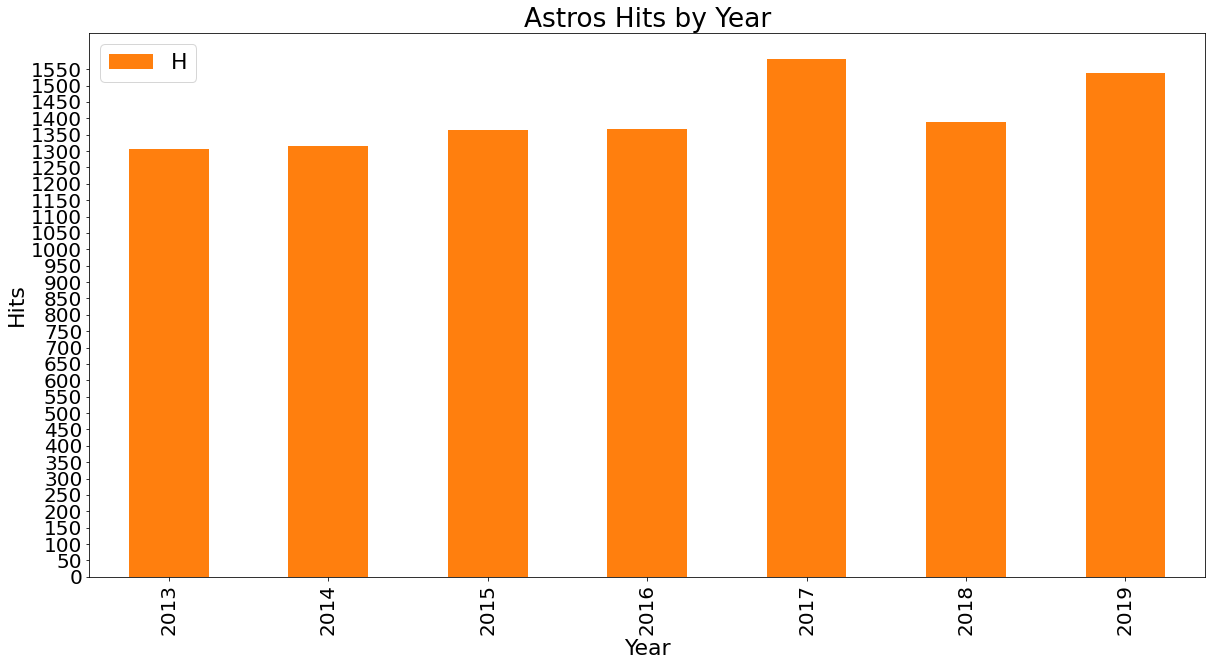

In [73]:
astros_16 = "SELECT playerID,yearID,teamID,G,AB,H,(1000*H/AB) as AVG,RBI,BB,SO FROM batting WHERE yearID >= '2013'  and teamID == 'HOU' "
astros16 = pd.read_sql(astros_16, conn)
hits = astros16[['yearID','H']].groupby('yearID').sum().plot(kind = 'bar',stacked=False,color = 'tab:orange' )
plt.title("Astros Hits by Year")
plt.yticks(np.arange(0, 1600, step=50))
plt.rcParams.update({'font.size': 22})
print( astros16[['yearID','H']].groupby('yearID').sum())
plt.xlabel("Year")
plt.ylabel("Hits")

Text(0, 0.5, 'Hits')

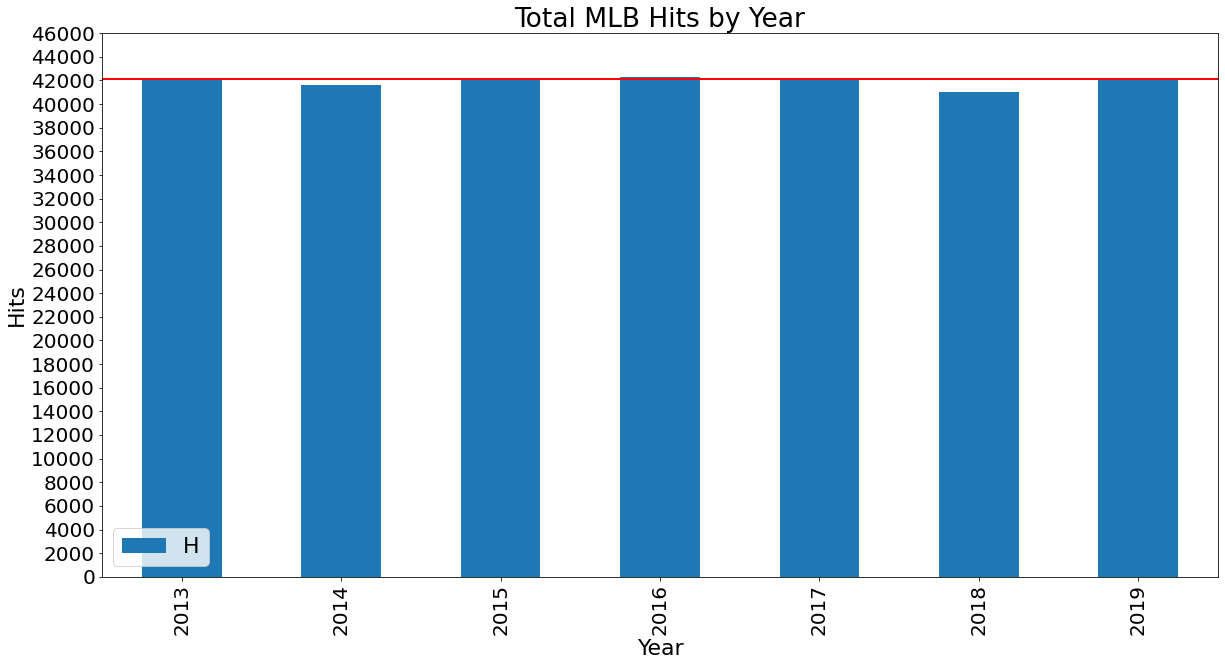

In [74]:
mlb16 = "SELECT playerID,yearID,teamID,G,AB,H,(1000*H/AB) as AVG,RBI,BB,SO FROM batting WHERE yearID >= '2013'   "
mlb = pd.read_sql(mlb16, conn)
hits = mlb[['yearID','H']].groupby('yearID').sum().plot(kind = 'bar',stacked=False )
plt.title("Total MLB Hits by Year")
plt.yticks(np.arange(0,48000, step = 2000))
plt.rcParams.update({'font.size': 22})
plt.axhline(42100, color='r', linewidth = 2)
plt.xlabel("Year")
plt.ylabel("Hits")

          SO
yearID      
2013    1535
2014    1442
2015    1392
2016    1452
2017    1087
2018    1197
2019    1166


Text(0, 0.5, 'Strikeouts')

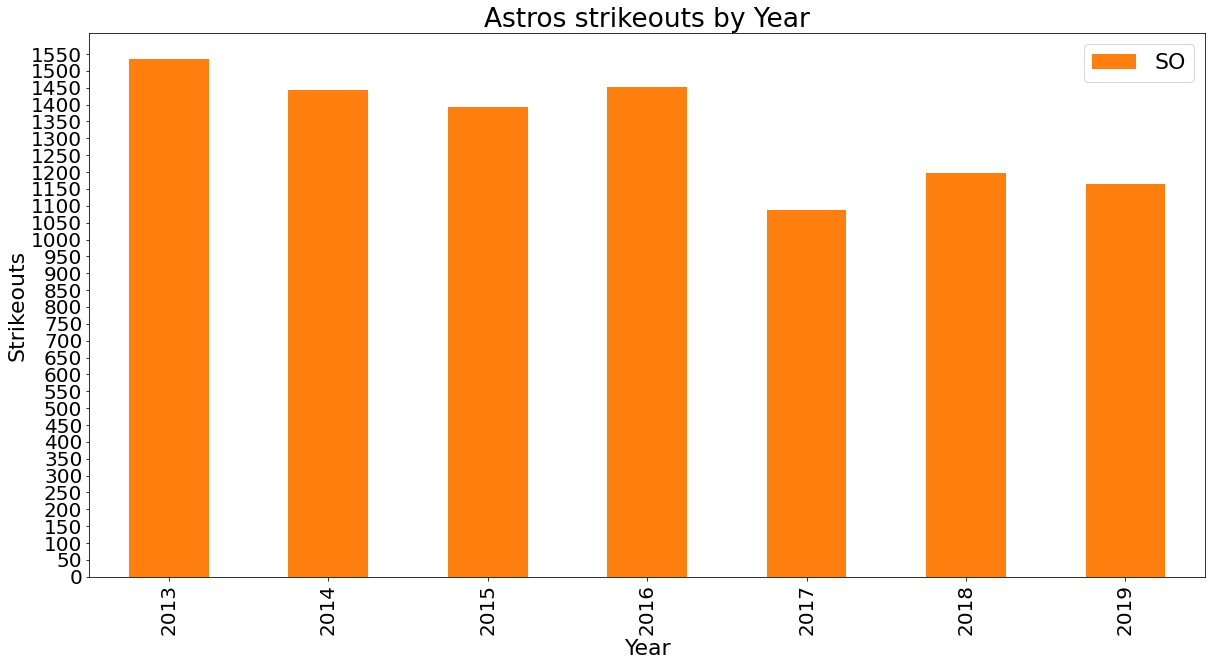

In [75]:

strikeouts = astros16[['yearID','SO']].groupby('yearID').sum().plot(kind = 'bar',stacked=False,color = 'tab:orange' )
plt.title("Astros strikeouts by Year")
plt.yticks(np.arange(0, 1600, step=50))
print( astros16[['yearID','SO']].groupby('yearID').sum())
plt.rcParams.update({'font.size': 22})
plt.xlabel("Year")
plt.ylabel("Strikeouts")

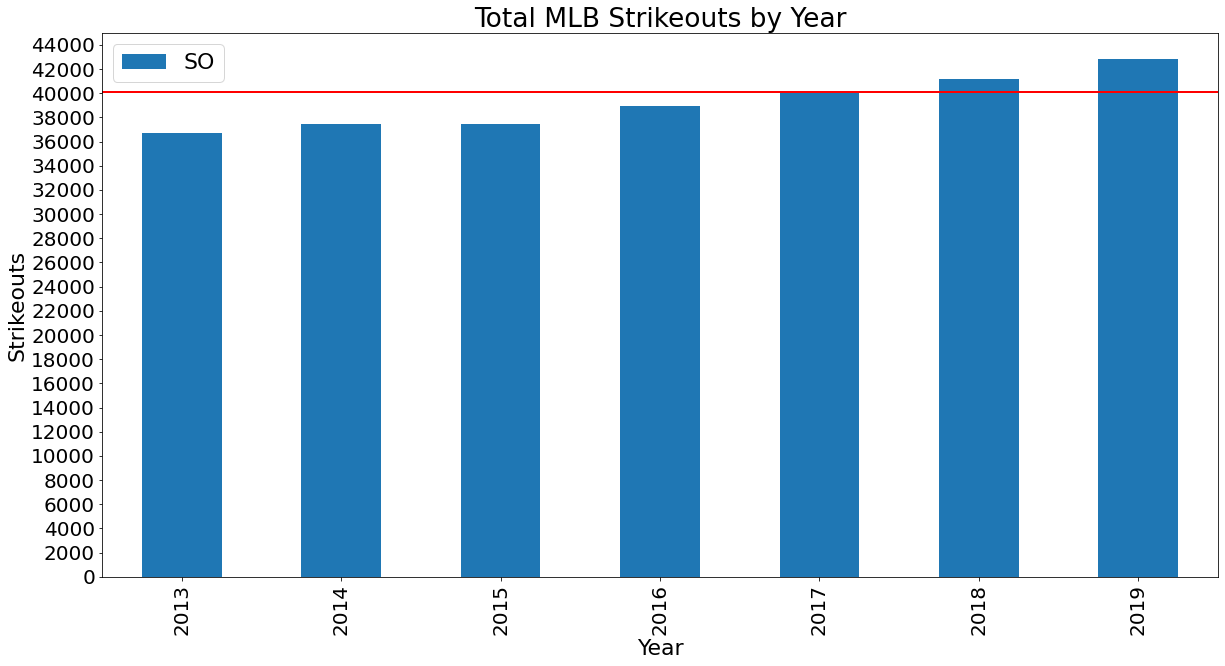

In [76]:
sos = mlb[['yearID','SO']].groupby('yearID').sum().plot(kind = 'bar',stacked=False )
plt.title("Total MLB Strikeouts by Year")
plt.yticks(np.arange(0,45000, step = 2000))
plt.rcParams.update({'font.size': 22})
plt.xlabel("Year")
plt.ylabel("Strikeouts")
plt.axhline(40100, color='r', linewidth = 2)

## Takeaways:
 - Looking at the Astros Hits by year graph, the Astros saw a tremendous increase in Hits from previous year to 2017. The MLB hits by year graph shows no signifcant trend in hits increasing over the years.
 - Now looking at the strikeouts per year, the Astros graph of SO per year trends downward with a huge dip at 2017.
 - If you look at the total mlb strikeouts by year, there is a clear upwards trend. So while the league strikeout rates have been trending upwards, the Astros trended downward

## Part 4: Model Creation and analysis
# Creating the Model
After gathering all of the data and visualising the statistics, we can see that the Astros 2017 season stats aren't what we would expect, with the knowledge from previous seasons. Of course, this makes sense because the Astros 2017 stats were fraudelent due to their cheating.
The next step in the data science life cycle is to use machine learning to try and predict batting averages in 2017, training our model on previous seasons, using important factors.
### Deciding the type of Model:
Since the goal is to predict batting average for 2017, a prediction model must be used. I went with Random Forest model.
## Random Forest:
"Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree" (TowardsDataScience) By using many different decision trees, it can merge the results together to get a more accurate prediction. The idea behind this, is that while each individual tree might not make a good prediction by itself, the information from all the trees combined will give a more accurate prediction.
 - Here is an image to help visualize how Random Forest works.
 - For more in-depth coverage on how Random forest works, visit https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

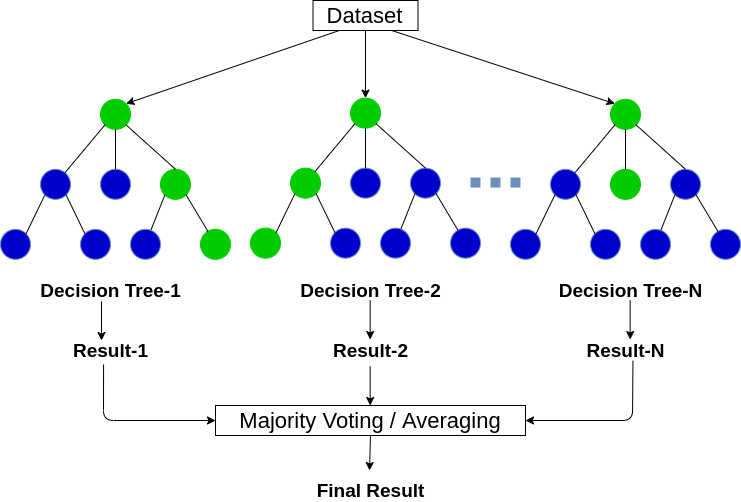

### Implementing the algorithm:
 - Using Sklearn, which has the needed functions for random forest already built in

Mean Absolute Error: 3.230080324909748
Mean Squared Error: 29.32135518546933
Root Mean Squared Error: 5.414919684119916


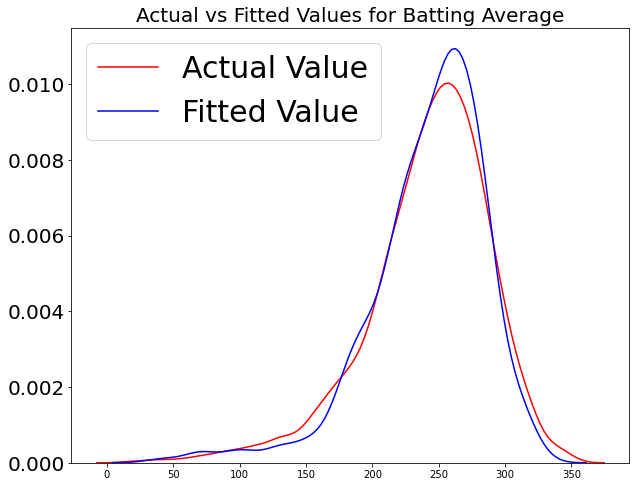

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

mlb_q = "SELECT yearID,G,AB,H,(1000*H/AB) as AVG,BB,SO FROM batting WHERE yearID >= '2013' and yearID <= 2017 and AB > 50 "
mlb = pd.read_sql(mlb_q, conn)
X = mlb.iloc[:, 0:4].values
y = mlb.iloc[:, 4].values
mlb.iloc[:,5:]
## Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(10, 8))
plt.title('Actual vs Fitted Values for Batting Average', fontsize=20)
ax = sns.distplot(y, hist=False, color="r",label="Actual Value")
sns.distplot(y_pred, hist=False, color="b" , label ="Fitted Value", ax=ax)


Great, after getting our results (shown in the graph, and the errors printed above the graph) we see that our model can predict the batting average for an MLB player with a root mean squared error of 5.4!
Now lets run the same model but only on Houston Astros players, to try and predict their batting averages.

Mean Absolute Error: 25.993527777777775
Mean Squared Error: 1128.5816345972225
Root Mean Squared Error: 33.59436909062622


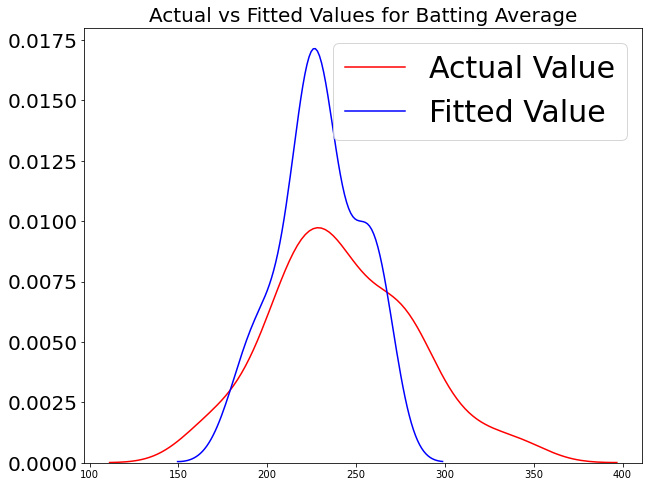

In [13]:
##Testing on Astros players
astros_q = "SELECT yearID,G,AB,H,(1000*H/AB) as AVG,BB,SO FROM batting WHERE yearID >= '2013' and yearID <= 2017 and teamID == 'HOU' and AB > 50 "
astrosmlb= pd.read_sql(astros_q, conn)
X = astrosmlb.iloc[:, 0:4].values
y = astrosmlb.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
import seaborn as sns
plt.figure(figsize=(10, 8))
plt.title('Actual vs Fitted Values for Batting Average', fontsize=20)
ax = sns.distplot(y, hist=False, color="r",label="Actual Value")
sns.distplot(y_pred, hist=False, color="b" , label ="Fitted Value", ax=ax)



Wait! The same model that produced an accurate prediction of an MLB players average for the 2017 season, can't accurately predict it for an Astros player. With a root mean squared error of 33.5, this model is way off compared to when it was run for all mlb players.
### How can this be explained?
 - This could maybe be explained by the fact that the model for predicting the whole MLB has a lot more data that it can use to train the model, compared to the model for predicting Astros batting Averages only.
 - It can also be because the Astros 2017 season was unpredictable because they cheated. The model couldn't take into account the Astros knowing which pitch was coming
 
Now we can look at how the model on the astros compares to the model on other teams. Running it on other teams may give a better idea because it will have the same amount of data for every individual team, including the Astros

Mean Absolute Error: 15.299388888888886
Mean Squared Error: 516.7184616944444
Root Mean Squared Error: 22.731442138466367


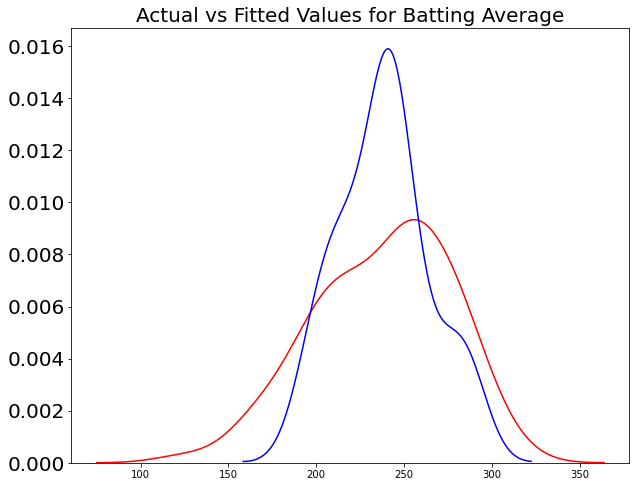

In [14]:
cle_q = "SELECT yearID,G,AB,H,(1000*H/AB) as AVG,BB,SO FROM batting WHERE yearID >= '2013' and yearID <= 2017 and teamID == 'SEA' and AB > 50 "
clemlb= pd.read_sql(cle_q, conn)
X = clemlb.iloc[:, 0:4].values
y = clemlb.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 8))
plt.title('Actual vs Fitted Values for Batting Average', fontsize=20)
ax = sns.distplot(y, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b" , ax=ax)

This test was using the model to predict batting averages for the Minnesota Twins in 2017. It can be seen from the graph that the RMSE (root mean squared error) is 22.7, which is significantly lower than the 33.5 RMSE for the Astros.

Let's try a few more teams, just to make sure

Mean Absolute Error: 16.11208333333333
Mean Squared Error: 410.676725486111
Root Mean Squared Error: 20.26516038639001


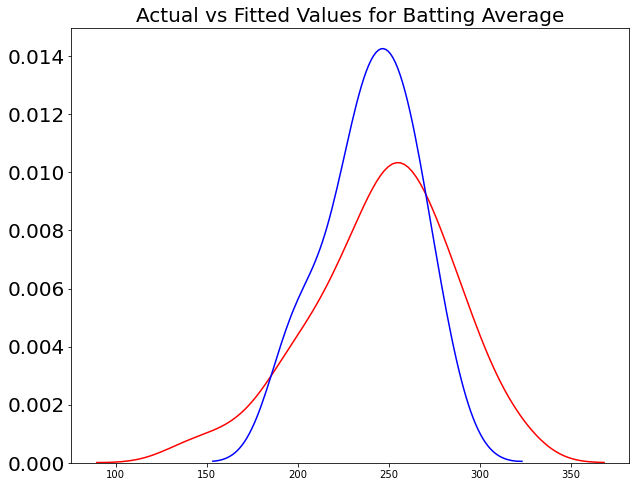

In [19]:
## Query for only  players on "TOR" (Toronto Blue Jays)
astros_q = "SELECT yearID,G,AB,H,(1000*H/AB) as AVG,BB,SO FROM batting WHERE yearID >= '2013' and yearID <= 2017 and teamID == 'TOR' and AB > 50 "
astrosmlb= pd.read_sql(astros_q, conn)
X = astrosmlb.iloc[:, 0:4].values
y = astrosmlb.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 8))
plt.title('Actual vs Fitted Values for Batting Average', fontsize=20)
ax = sns.distplot(y, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b" , ax=ax)

Once again, the RMSE (~20.3) for predicting the Minnesota Twins batting average in 2017 is much lower than the RMSE for the Astros


Mean Absolute Error: 14.576394736842106
Mean Squared Error: 326.2567936710526
Root Mean Squared Error: 18.062579928433607


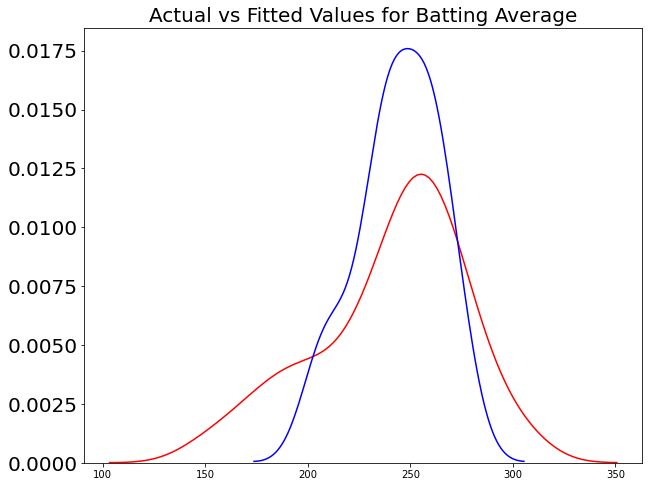

In [21]:
## query for players on "TBA" (Tamba Bay Rays)
astros_q = "SELECT yearID,G,AB,H,(1000*H/AB) as AVG,BB,SO FROM batting WHERE yearID >= '2013' and yearID <= 2017 and teamID == 'TBA' and AB > 50 "
astrosmlb= pd.read_sql(astros_q, conn)
X = astrosmlb.iloc[:, 0:4].values
y = astrosmlb.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 8))
plt.title('Actual vs Fitted Values for Batting Average', fontsize=20)
ax = sns.distplot(y, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b" , ax=ax)

Again, the RMSE (18) for predicting the Rays batting averages in 2017 is significantly lower than the RMSE (33.6) for the Astros.

Clearly, predicting other teams was more accurate.

### Let's try predicting the Astros batting average in 2016 using our model
 - By doing this, the results for the Astros should be similar to results from the other teams
 
To Recap: In the 2017 predictions we got the root mean square errors
 
 
 
 Houston Astros: 33.6
 
 Minnesota Twins: 22.7
 
 Toronto BlueJays: 20.3
 
 Tamba Bay Rays: 18

Mean Absolute Error: 19.013300000000005
Mean Squared Error: 525.5448967750001
Root Mean Squared Error: 22.92476601352782


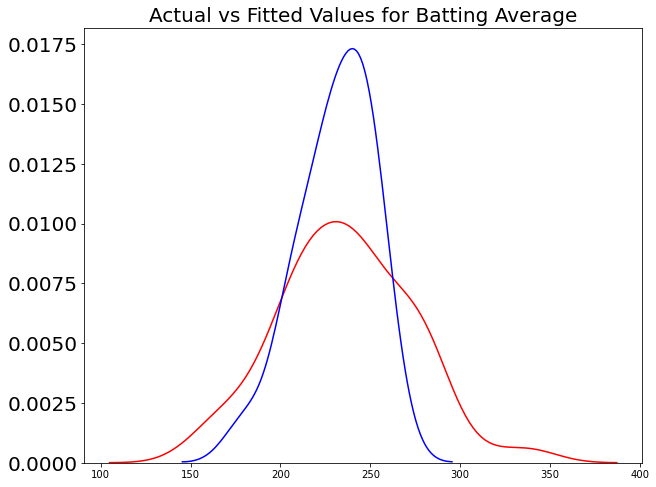

In [22]:
## Query for only player on "HOU"
astros_q = "SELECT yearID,G,AB,H,(1000*H/AB) as AVG,BB,SO FROM batting WHERE yearID >= '2012' and yearID <= 2016 and teamID == 'HOU' and AB > 50 "
astrosmlb= pd.read_sql(astros_q, conn)
X = astrosmlb.iloc[:, 0:4].values
y = astrosmlb.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 8))
plt.title('Actual vs Fitted Values for Batting Average', fontsize=20)
ax = sns.distplot(y, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b" , ax=ax)

After running the model to predict the Astros batting average for the 2016 season, we get a RMSE of 22.9.

This is already much closer to the values we got for predicting teams, other than the Astros, in 2017. 

Now let's predict for another team in  2016:

Mean Absolute Error: 17.728323529411767
Mean Squared Error: 553.325556867647
Root Mean Squared Error: 23.522873057253168


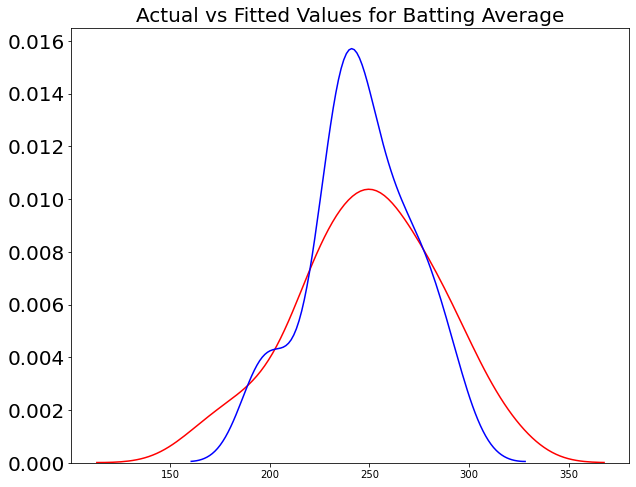

In [23]:
##Query for TOR
astros_q = "SELECT yearID,G,AB,H,(1000*H/AB) as AVG,BB,SO FROM batting WHERE yearID >= '2012' and yearID <= 2016 and teamID == 'TOR' and AB > 50 "
astrosmlb= pd.read_sql(astros_q, conn)
X = astrosmlb.iloc[:, 0:4].values
y = astrosmlb.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(10, 8))
plt.title('Actual vs Fitted Values for Batting Average', fontsize=20)
ax = sns.distplot(y, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b" , ax=ax)

The results for predicting the Toronto BlueJays batting averages in 2016 gave a root mean squared error ofr 23.5 . This result is fairly close to the root mean squared error of 20.3 

From this, the Astros prediction error should be similar for 2016 and 2017, but it is not. The RMSE for predicting the Astros batting average in 2017 was 33.6, compared to the 22.9 for predicting the 2016 batting averages. A pretty significant difference

## Results
It looks like Random Forest produced a pretty accurate model for predicting batting averages, as we saw from the small root mean squared error 5.4 . Then we tested on the Astros and saw a much bigger RMSE of ~33! Even though the sample size for each individual team is smaller than the sample size for the entire MLB, the model produced the least accurate results for the Houston Astros. To strengthen my argument, I ran the model to predict batting averages for the 2016 season, and the model was far more accurate for the Astros in 2016 compared to 2017. This further shows that the Astros 2017 season was unprecedented, and their increase in batting average was due to the cheating.

## Conclusion:
After analyzing and visualizing our data, we first saw that the Astros had one of the highest team averages in 2017 and were second in fewest strikeouts. I suspected that this was because they cheated. I was able to create a model that predicts batting averages for a certain season. The results from this model verified the idea that the Houston Astros cheating did in fact impact their offensive statistics in a big way. The model was able to predict the batting average for every team with a smaller error than the error for the Astros
